## Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd

sal_data = pd.read_csv('/Users/jay/Desktop/Spring 2023/ML/My projects/salaryData_cleaned.csv')
sal_data

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,python_yn,studio,studio_yn,spark_yn,sql_yn,aws_yn,azure_yn,excel_yn,ml_yn,scikit_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,1,0,0,0,0,0,0,1,1,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,1,0,0,0,0,0,0,0,1,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,0,0,1,1,0,0,1,1,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,1,0,0,0,0,0,0,0,1,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,...,0,0,0,0,0,1,0,0,0,0
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,...,1,0,0,1,1,1,0,0,1,0
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,...,0,0,0,0,0,0,0,1,1,0
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,...,0,0,0,0,0,0,0,1,1,0


In [3]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'reserach' in title.lower() or 'scientist' in title.lower():
        return 'research scientist'
    else:
         return 'na'

def job_seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'juinor' in title.lower():
        return 'junior'
    else:
        return 'na'
        

In [4]:
sal_data['job_simplified'] = sal_data['Job Title'].apply(title_simplifier)
sal_data.job_simplified.value_counts()

data scientist        279
research scientist    143
data engineer         119
analyst               102
na                     41
manager                22
mle                    22
director               14
Name: job_simplified, dtype: int64

In [5]:
sal_data['seniority'] = sal_data['Job Title'].apply(job_seniority)
sal_data.seniority.value_counts()

na        520
senior    220
junior      2
Name: seniority, dtype: int64

In [6]:
#fixng state as Los Angeles
sal_data['state'] = sal_data['state'].apply(lambda x: x.strip() if x.strip() != 'Los Angeles' else 'CA')
sal_data.state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: state, dtype: int64

In [7]:
# job description lenght

sal_data['job_desc_len'] = sal_data['Job Description'].apply(lambda x: len(x))
sal_data['job_desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: job_desc_len, Length: 742, dtype: int64

In [8]:
# Competitors

sal_data['num_competitors'] = sal_data['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
sal_data['num_competitors']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_competitors, Length: 742, dtype: int64

In [9]:
# hourly wage to annual

sal_data['min_salary'] = sal_data.apply(lambda x: x.min_salary * 2 if x.hourly == 1 else x.min_salary,axis=1)
sal_data['max_salary'] = sal_data.apply(lambda x: x.max_salary * 2 if x.hourly == 1 else x.max_salary,axis=1)

In [10]:

sal_data[sal_data.hourly == 1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [11]:
sal_data = sal_data.rename(columns={'comapany_txt':'company_txt'})

In [12]:
sal_data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'state', 'same_state', 'age', 'python_yn', 'studio',
       'studio_yn', 'spark_yn', 'sql_yn', 'aws_yn', 'azure_yn', 'excel_yn',
       'ml_yn', 'scikit_yn', 'job_simplified', 'seniority', 'job_desc_len',
       'num_competitors'],
      dtype='object')

In [13]:
sal_data['company_txt'] = sal_data['company_txt'].apply(lambda x: x.replace('\n',''))
sal_data['company_txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [14]:
sal_data.to_csv('glassdoorData_cleaned.csv',index=False)

<AxesSubplot:>

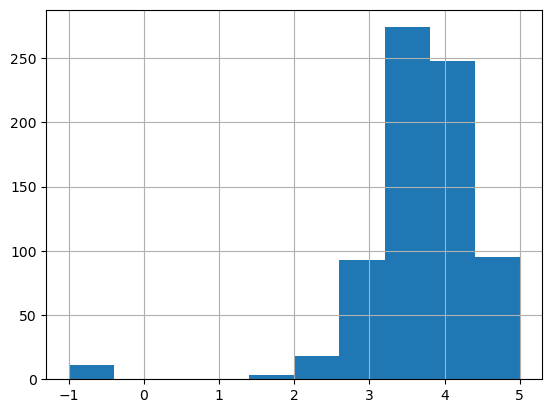

In [13]:
sal_data['Rating'].hist()

<AxesSubplot:>

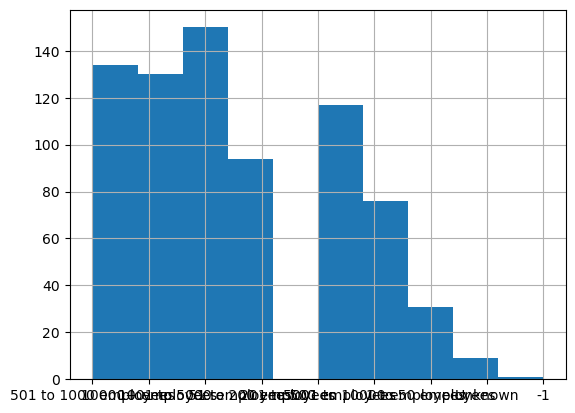

In [14]:
sal_data['Size'].hist()

<AxesSubplot:>

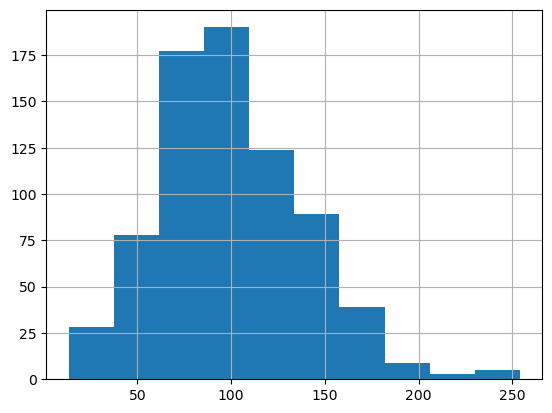

In [15]:
sal_data['avg_salary'].hist()

<AxesSubplot:>

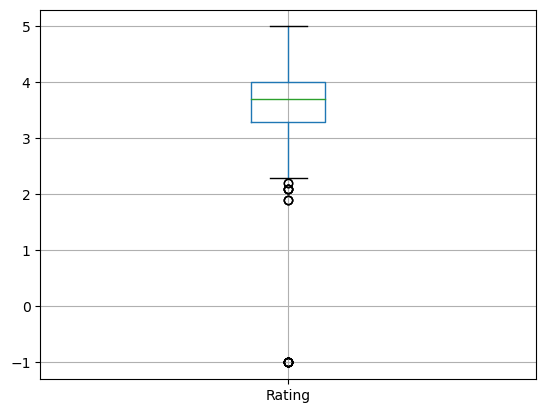

In [16]:
sal_data.boxplot(column='Rating')

<AxesSubplot:>

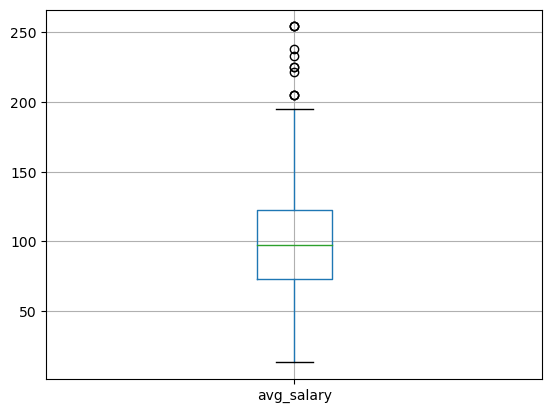

In [17]:
sal_data.boxplot(column='avg_salary')

<AxesSubplot:>

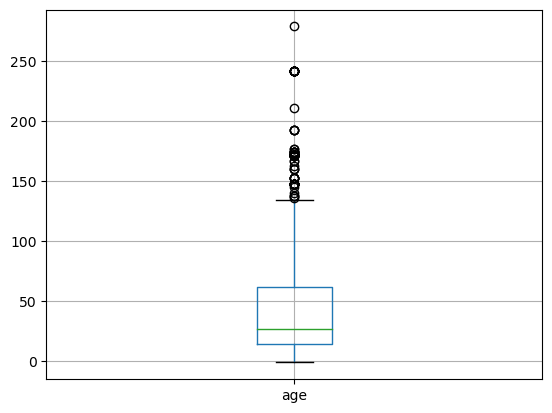

In [18]:
sal_data.boxplot(column='age')

In [19]:
# correlation
sal_data[['age','avg_salary','Rating','job_desc_len']].corr()

,age,avg_salary,Rating,job_desc_len
age,1.000000,0.019410,0.026164,0.164730
avg_salary,0.019410,1.000000,0.013492,0.078808
Rating,0.026164,0.013492,1.000000,-0.012281
job_desc_len,0.164730,0.078808,-0.012281,1.000000


From the correlation we can see that ratings have a negative correaltion with job_desc_len
Older companies tend to have a relatively longer job_desc_len

<AxesSubplot:>

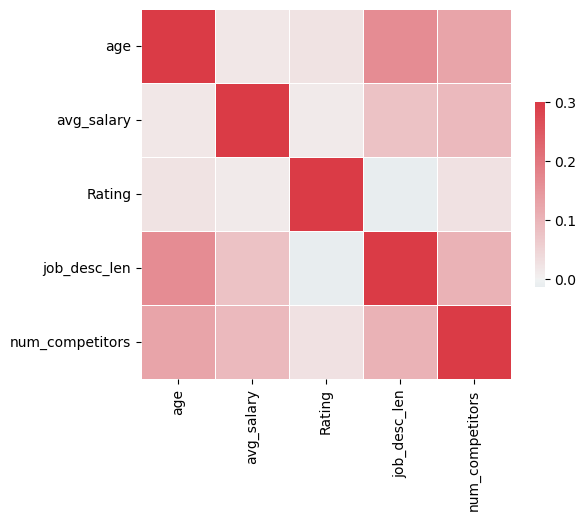

In [20]:
import seaborn as sns

cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(sal_data[['age','avg_salary','Rating','job_desc_len','num_competitors']].corr(),vmax=0.3, center=0, cmap=cmap, 
            square=True,linewidth=0.5,cbar_kws={'shrink':0.5})

When were are nuilding model we will have to take into acount what is correlated with what. Therefore the correlation plot helps us identify it

In [21]:
sal_data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'state', 'same_state', 'age', 'python_yn', 'studio',
       'studio_yn', 'spark_yn', 'sql_yn', 'aws_yn', 'azure_yn', 'excel_yn',
       'ml_yn', 'scikit_yn', 'job_simplified', 'seniority', 'job_desc_len',
       'num_competitors'],
      dtype='object')

In [22]:
# analysis of categorical variables
data_cat = sal_data[['Company Name', 'Location', 'Headquarters','Size','Type of ownership', 'Industry', 'Sector'
                    ,'Revenue','company_txt','state','python_yn', 'studio',
       'studio_yn', 'spark_yn', 'sql_yn', 'aws_yn', 'azure_yn', 'excel_yn',
       'ml_yn', 'scikit_yn', 'job_simplified', 'seniority']]

graph for Company Name: total= 343


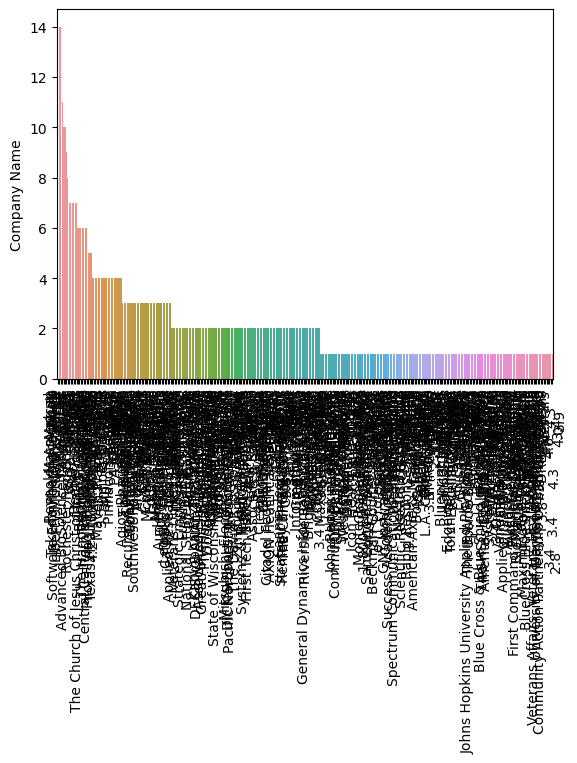

graph for Location: total= 200


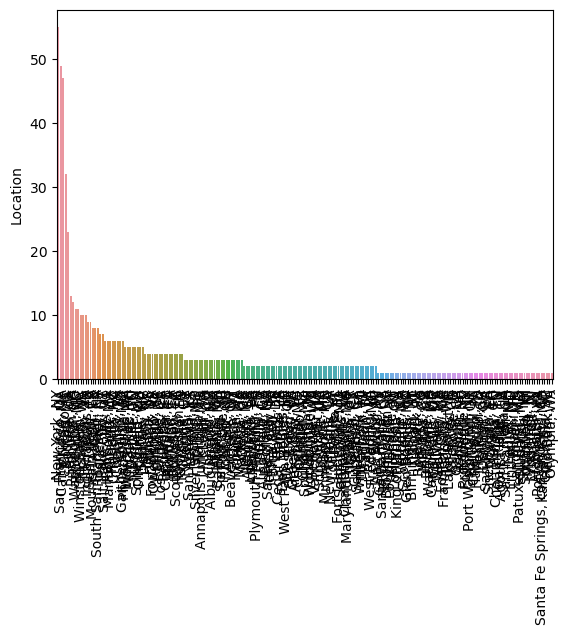

graph for Headquarters: total= 198


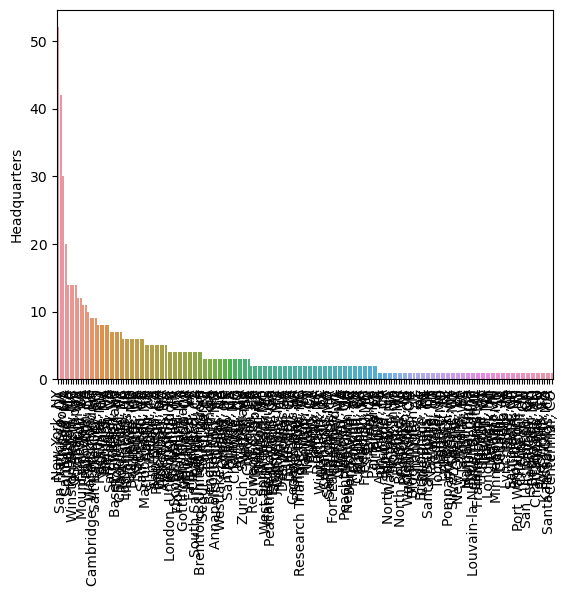

graph for Size: total= 9


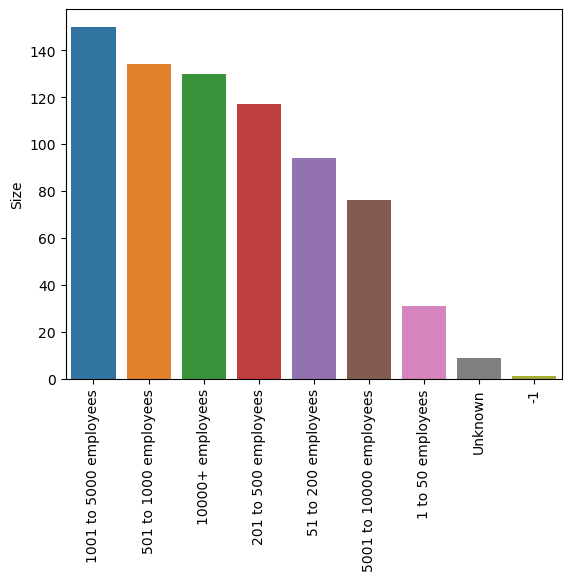

graph for Type of ownership: total= 11


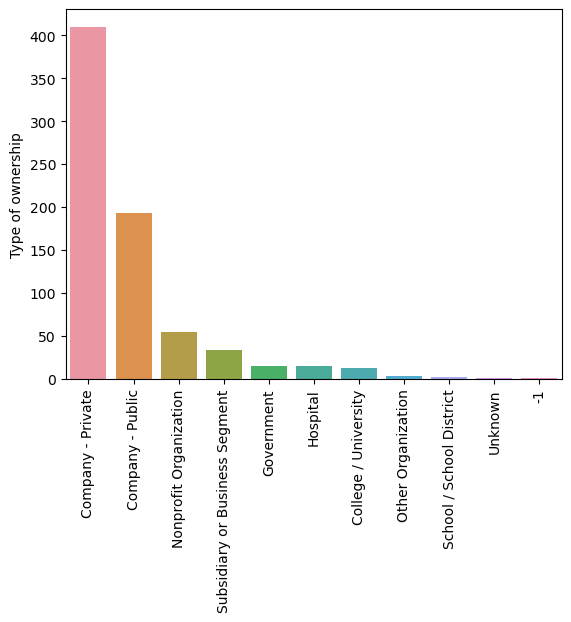

graph for Industry: total= 60


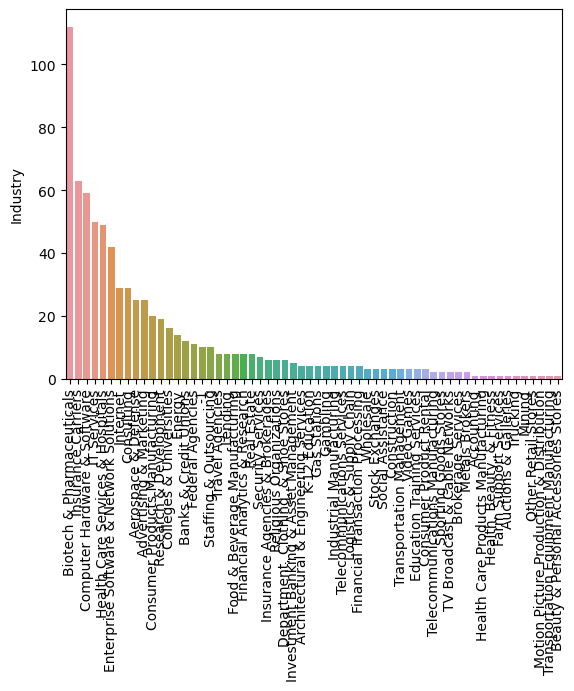

graph for Sector: total= 25


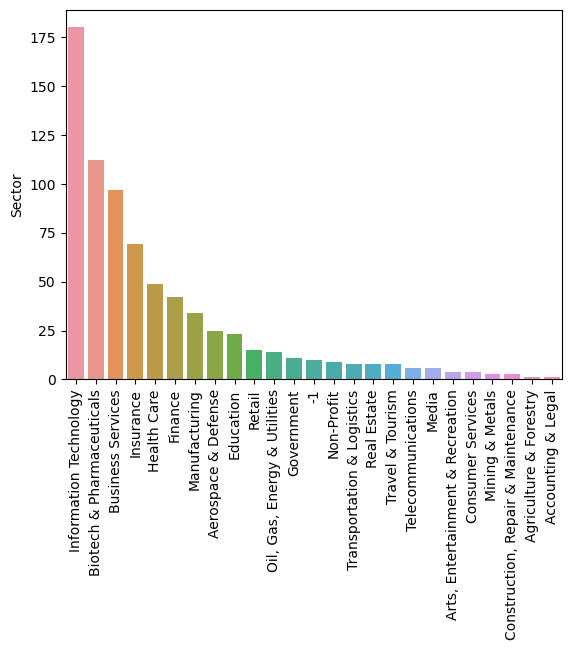

graph for Revenue: total= 14


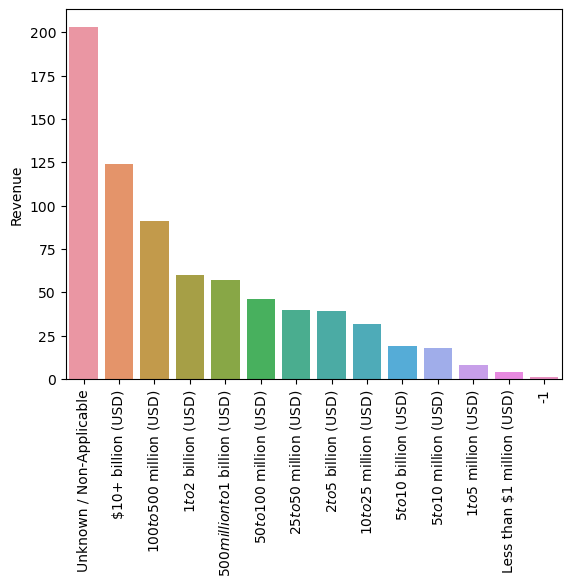

graph for company_txt: total= 343


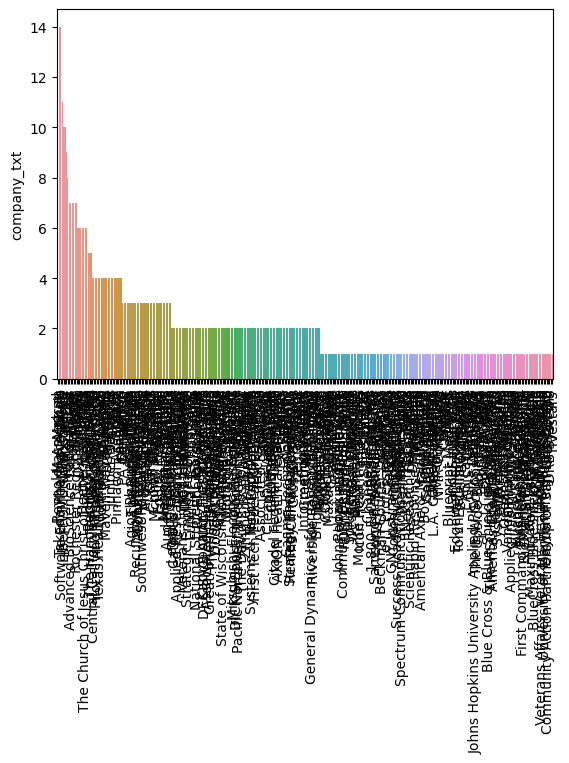

graph for state: total= 37


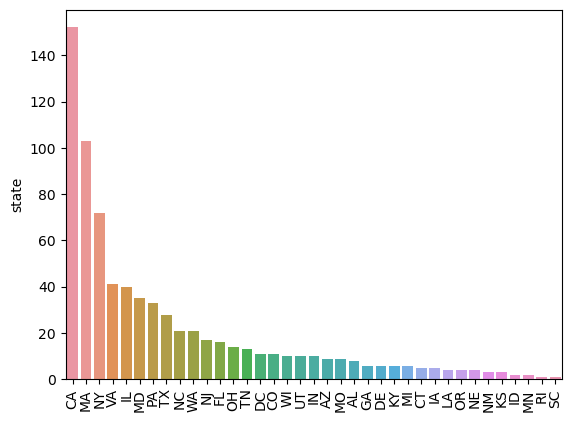

graph for python_yn: total= 2


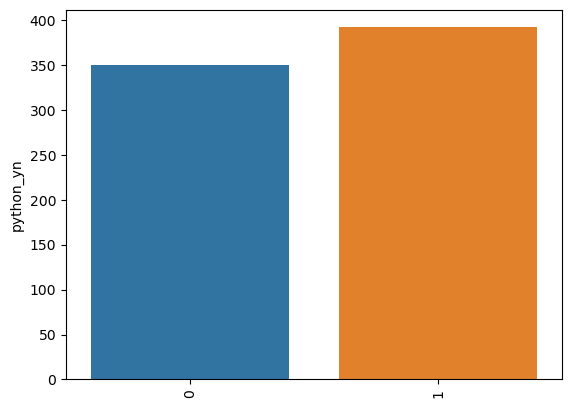

graph for studio: total= 2


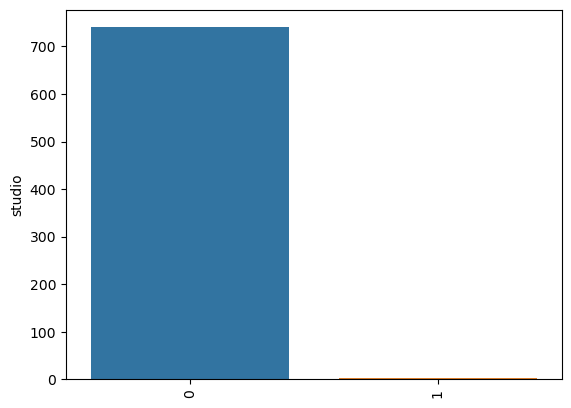

graph for studio_yn: total= 2


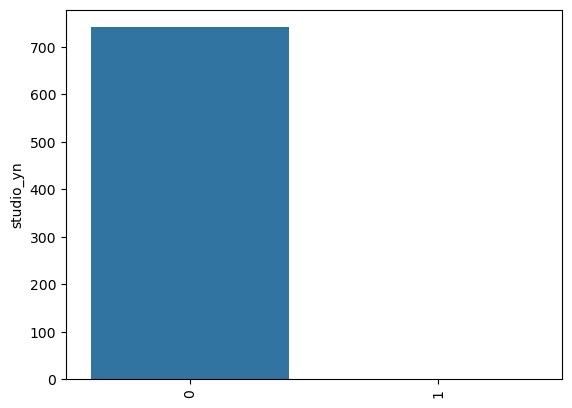

graph for spark_yn: total= 2


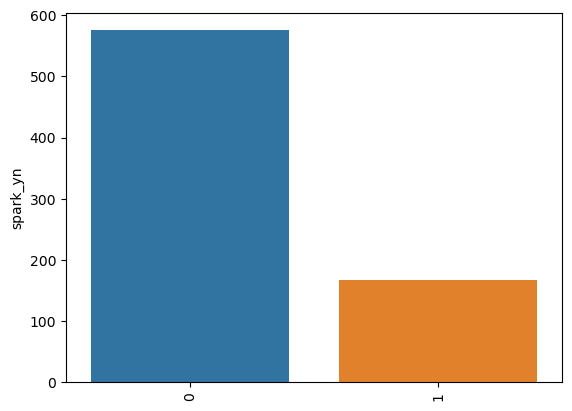

graph for sql_yn: total= 2


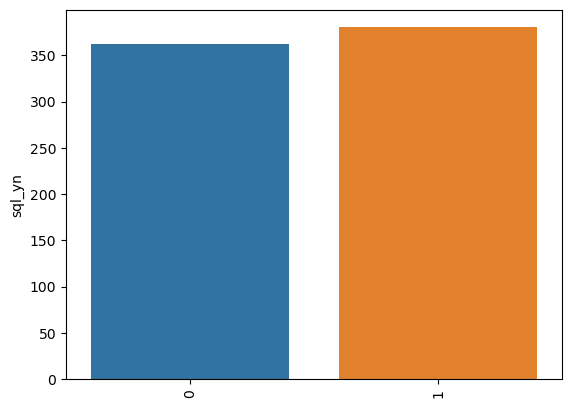

graph for aws_yn: total= 2


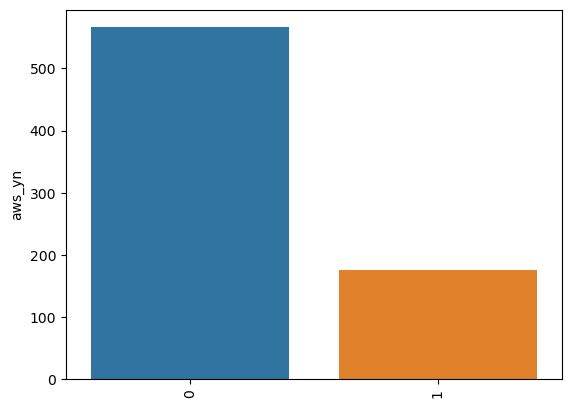

graph for azure_yn: total= 2


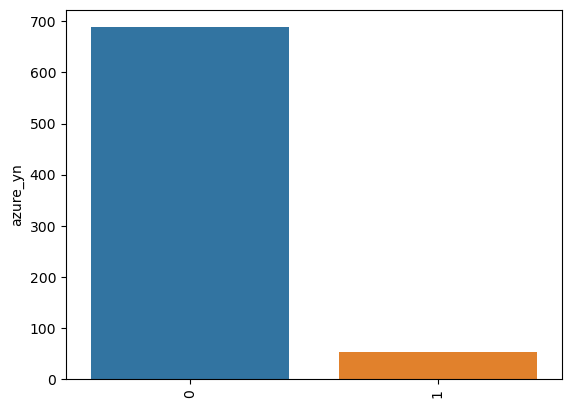

graph for excel_yn: total= 2


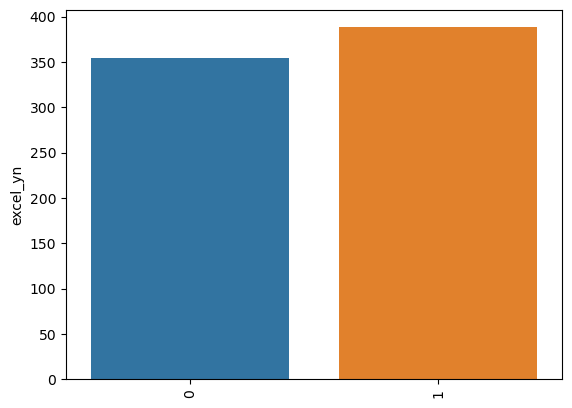

graph for ml_yn: total= 2


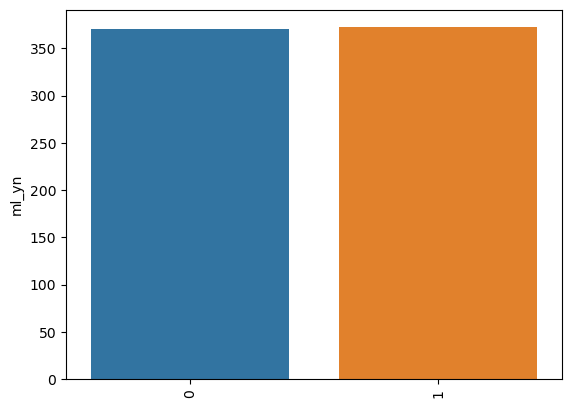

graph for scikit_yn: total= 2


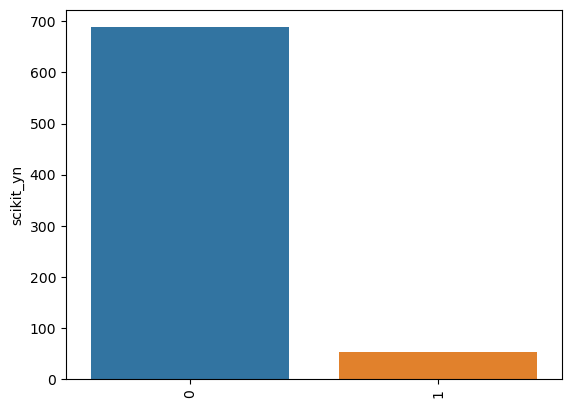

graph for job_simplified: total= 8


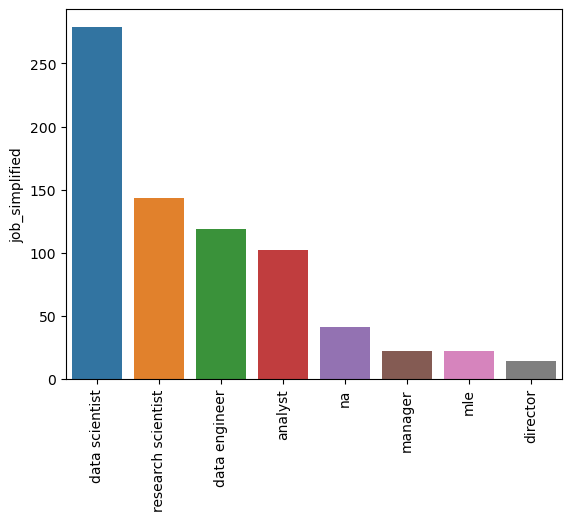

graph for seniority: total= 3


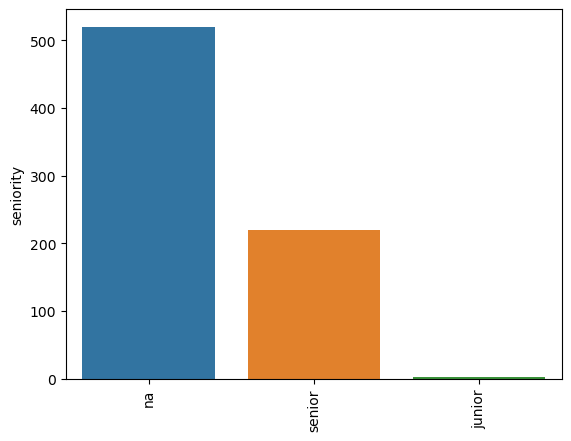

In [23]:
import matplotlib.pyplot as plt
for i in data_cat.columns:
    cat_var = data_cat[i].value_counts()
    print('graph for %s: total= %d'% (i,len(cat_var)))
    chart = sns.barplot(x=cat_var.index,y=cat_var)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

graph for Location: total= 20


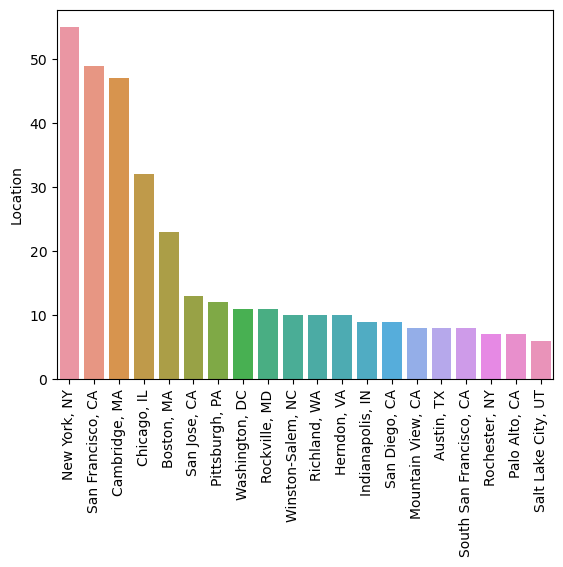

graph for Headquarters: total= 20


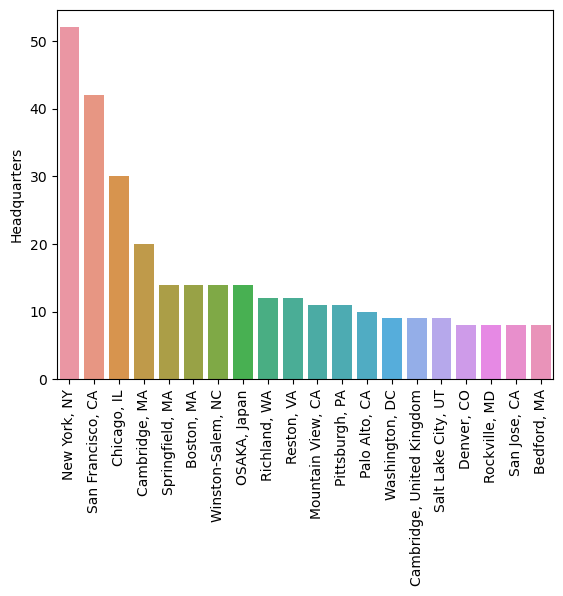

graph for company_txt: total= 20


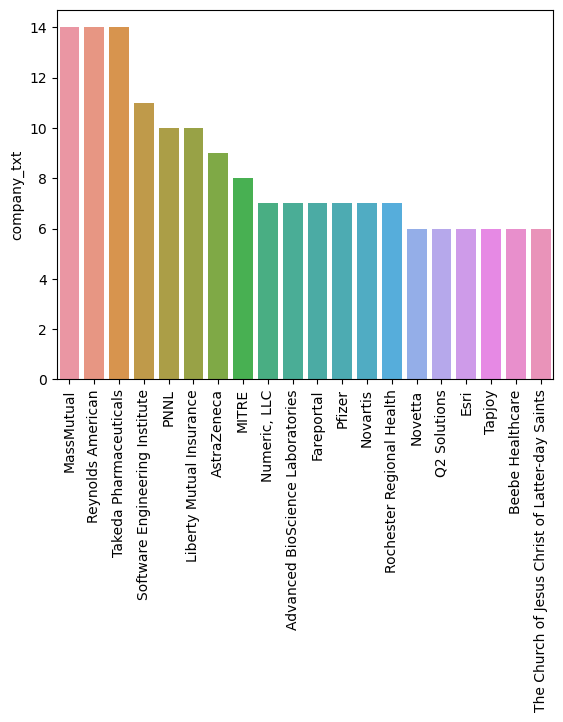

In [24]:
for i in data_cat[['Location', 'Headquarters','company_txt']]:
    cat_var = data_cat[i].value_counts()[:20]
    print('graph for %s: total= %d'% (i,len(cat_var)))
    chart = sns.barplot(x=cat_var.index,y=cat_var)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [25]:
sal_data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'state', 'same_state', 'age', 'python_yn', 'studio',
       'studio_yn', 'spark_yn', 'sql_yn', 'aws_yn', 'azure_yn', 'excel_yn',
       'ml_yn', 'scikit_yn', 'job_simplified', 'seniority', 'job_desc_len',
       'num_competitors'],
      dtype='object')

In [26]:
# pivot table analysis

pd.pivot_table(sal_data,index='job_simplified',values='avg_salary')

,avg_salary
job_simplified,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,88.536585
research scientist,83.797203


In [27]:
pd.pivot_table(sal_data,index=['job_simplified','seniority'],values='avg_salary')

avg_salary
job_simplified     seniority            
analyst            junior      56.500000
                   na          61.155405
                   senior      79.092593
data engineer      na          96.701220
                   senior     124.689189
data scientist     junior     106.500000
                   na         107.043011
                   senior     138.956522
director           na         168.607143
manager            na          84.022727
mle                na         119.133333
                   senior     142.071429
na                 na          86.096774
                   senior      96.100000
research scientist na          70.078125
                   senior     111.819149

In [28]:
pd.set_option('display.max_rows',None)
pd.pivot_table(sal_data,index=['state','job_simplified'],values='avg_salary',aggfunc = 'count').sort_values('state',ascending= True)

avg_salary
state job_simplified                
AL    analyst                      5
      data engineer                1
      na                           1
      research scientist           1
AZ    analyst                      1
      data engineer                5
      data scientist               1
      na                           2
CA    na                           7
      mle                          5
      manager                      9
      research scientist          20
      data engineer               25
      analyst                     18
      data scientist              68
CO    analyst                      1
      data engineer                3
      data scientist               3
      mle                          1
      research scientist           3
CT    na                           3
      data scientist               2
DC    analyst                      2
      data engineer                4
      data scientist               5
DE    research scientist           6
FL    analyst                      6
      data engineer                3
      data scientist               7
GA    research scientist           3
      data scientist               3
IA    analyst                      2
      data engineer                3
ID    analyst                      2
IL    analyst                      3
      data engineer                8
      data scientist              15
      director                     6
      mle                          2
      na                           2
      research scientist           4
IN    data engineer                4
      data scientist               2
      na                           4
KS    mle                          3
KY    data scientist               2
      research scientist           4
LA    analyst                      1
      data engineer                2
      research scientist           1
MA    analyst                      4
      data engineer               12
      data scientist              30
      director                     6
      manager                      5
      na                           7
      research scientist          39
MD    research scientist          12
      data scientist              13
      na                           4
      data engineer                3
      analyst                      3
MI    data scientist               4
      manager                      2
MN    analyst                      1
      data engineer                1
MO    analyst                      2
      data scientist               3
      manager                      1
      na                           2
      research scientist           1
NC    data engineer                6
      data scientist               3
      research scientist          12
NE    research scientist           4
NJ    analyst                      6
      data engineer                2
      data scientist               4
      director                     2
      manager                      2
      research scientist           1
NM    data scientist               3
NY    analyst                     14
      data engineer                4
      data scientist              40
      mle                          2
      na                           2
      research scientist          10
OH    research scientist           3
      data scientist               7
      analyst                      4
OR    data engineer                1
      data scientist               3
PA    analyst                      8
      data engineer                1
      data scientist               6
      manager                      3
      mle                          7
      na                           2
      research scientist           6
RI    analyst                      1
SC    research scientist           1
TN    data engineer               10
      data scientist               1
      analyst                      2
TX    data engineer                8
      data scientist          

In [29]:

pd.pivot_table(sal_data[sal_data['job_simplified']== 'data scientist'],index=['state','seniority'],
               values='avg_salary').sort_values('state',ascending= True)


avg_salary
state seniority            
AZ    na          69.500000
CA    na         131.681818
      senior     162.395833
CO    na          87.500000
      senior     119.250000
CT    na          84.000000
DC    na         126.875000
      senior     237.500000
FL    na          87.500000
      senior     122.000000
GA    na          81.333333
IL    senior     133.187500
      na          99.000000
IN    na          84.500000
KY    na          84.000000
MA    na         101.476190
      senior     142.388889
MD    na          95.333333
      senior     140.125000
MI    na          96.000000
      senior     117.250000
MO    na         127.666667
NC    senior     124.500000
      na         102.000000
NJ    na         115.250000
      senior      98.500000
NM    na          74.333333
NY    na         104.750000
      senior     146.750000
OH    na         101.000000
      senior     107.000000
OR    na          98.500000
PA    na         105.000000
      senior     155.000000
TN    na          96.000000
TX    na         100.750000
      senior     100.666667
UT    senior     140.500000
VA    junior     106.500000
      na         103.541667
      senior     120.500000
WA    na          77.944444
      senior     124.312500
WI    na         120.000000
      senior     100.500000

In [35]:
sal_data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'state', 'same_state', 'age', 'python_yn', 'studio',
       'studio_yn', 'spark_yn', 'sql_yn', 'aws_yn', 'azure_yn', 'excel_yn',
       'ml_yn', 'scikit_yn', 'job_simplified', 'seniority', 'job_desc_len',
       'num_competitors'],
      dtype='object')

In [31]:
data_pivots = sal_data[['Rating','Industry', 'Sector','Revenue','num_competitors',
                       'hourly', 'employer_provided',
                      'python_yn', 'studio',
       'studio_yn', 'spark_yn', 'sql_yn', 'aws_yn', 'azure_yn', 'excel_yn',
       'ml_yn', 'scikit_yn']]

In [32]:
for i in data_pivots.columns:
    print(i)
    print(pd.pivot_table(sal_data,index=i,values= 'avg_salary').sort_values('avg_salary',ascending=False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

In [38]:
pd.pivot_table(sal_data,index='Revenue',columns ='python_yn', values='avg_salary',aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


Generating a word cloud from the job description

In [41]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 2.5 MB/s eta 0:00:00a 0:00:01


In [47]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/jay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jay/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [48]:
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

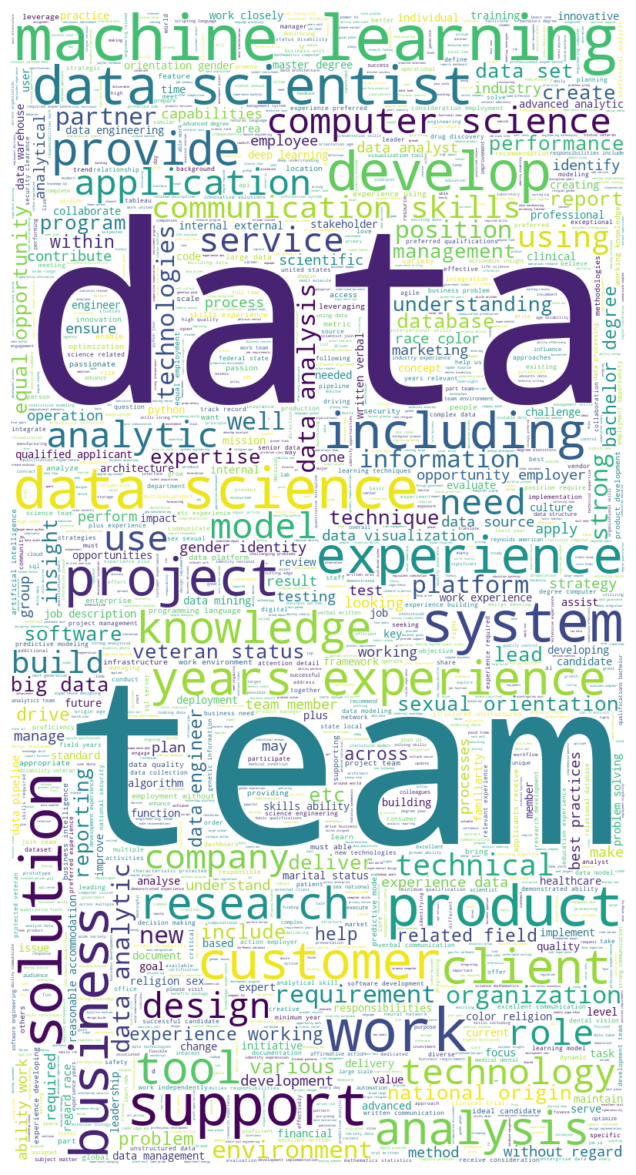

In [49]:
words = " ".join(sal_data['Job Description'])

def punctuation_stop(text):
    """removing punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered
words_filtered = punctuation_stop(words)
text = " ".join([i for i in words_filtered])
wc= WordCloud(background_color='white',random_state=1,stopwords = STOPWORDS,max_words=2000,width=800,height=1500)
wc.generate(text)
plt.figure(figsize=[12,15])
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()
